# Latent Consistency Models with ONNX and OpenVINO Execution Provider

Install required packages

In [ ]:
%pip install -q "onnx==1.16.0"
%pip install -q "optimum==1.19.1" "optimum-intel==1.16.1" "diffusers==0.27.2" --extra-index-url https://download.pytorch.org/whl/cpu


Download the model and save it locally 

In [ ]:
!optimum-cli export onnx --model SimianLuo/LCM_Dreamshaper_v7 lcm_onnx

Create ORTLatentConsistencyModelPipeline with OpenVINO Execution Provider for AI inference on the integrated GPU

In [2]:
from optimum.onnxruntime import ORTLatentConsistencyModelPipeline

pipeline = ORTLatentConsistencyModelPipeline.from_pretrained("SimianLuo/LCM_Dreamshaper_v7", 
	provider="OpenVINOExecutionProvider", 
    provider_options={'device_type' : 'GPU.0',
	'cache_dir' : './temp/'})

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Run AI inference on the integrated GPU 

  0%|          | 0/4 [00:00<?, ?it/s]

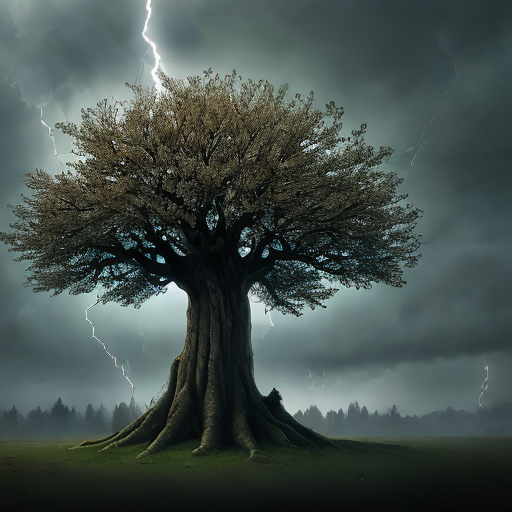

In [3]:
prompt = "tree with lightning in the background, 8k"
images = pipeline(prompt, num_inference_steps=4, guidance_scale=8.0, height=512, width=512).images[0]
images